In [126]:
import sys 
import math
from collections import namedtuple
from enum import Enum

In [146]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [3]:
print(sys.version)

3.7.3 (v3.7.3:ef4ec6ed12, Mar 25 2019, 16:52:21) 
[Clang 6.0 (clang-600.0.57)]


### Helpful resources:
- https://warwick.ac.uk/fac/sci/physics/staff/academic/boyd/stuff/lec_oscillations.pdf
- https://indico.cern.ch/event/394935/sessions/79502/attachments/1212451/1768922/Oscillations.pdf
- https://www.nature.com/articles/ncomms7935.pdf?origin=ppub


P(Ve -> Vu) = sin^2(2*θ)*sin^2(1.27*deltaM^2*(L/Ev))
            
          = (sin(2θ))^2*(sin(1.27*deltaM^2*(L/Ev))^2

- theta is the mixing angle
- deltaM is the mass differences between the neutrinos
- L is the oscillation distance
- Ev is the neutrino energy

## Solar Neutrinos
electron and muon neutrinos

experimental data suggests:
- ∆m^2sol = (7.6 ± 0.2) × 10−5eV2
- sin^2(2θsol) = 0.8 ± 0.1

so, let's work out the probablity of measuring a muon neutrino for a given oscialltion distance and energy

In [249]:
sin_squared_two_theta = 0.8
delta_m_squared = 7.9*10**-5
E = 5 # GeV
L = 13000 # km

In [250]:
L/E

2600.0

In [251]:
P = sin_squared_two_theta*(math.sin(1.27*delta_m_squared*(L/E)))**2

In [252]:
P

0.05321389757383813

In [123]:
two_phase = namedtuple('two_phase', 'sin_square_two_theta, delta_m_squared')

In [175]:
class TwoPhase(Enum):
    solar = two_phase(0.85, 7.9*10**-5)
    atmospheric = two_phase(0.093,2.5**10-3)

In [176]:
def two_phase_oscillation(oscillation_type, E, L):
    sin_s_t_theta, delta_m = [i for i in TwoPhase[oscillation_type].value]
    return sin_s_t_theta*(math.sin(1.27*delta_m*(L/E)))**2

In [177]:
two_phase_oscillation('solar', 5, 13000)

0.056539766172203014

### Santiy check
The probabilty of 2 phase osciallation should follow a sine wave.
plot proabbaility of flavour change over a given distance for a fixed energy. Plot Solar neutrinos with energy 5MeV, and atmospheric neutrinos with energy 2GeV

In [245]:
osc_distances = [i for i in range(0,400,1)]

Text(0, 0.5, 'Probability of flavour change')

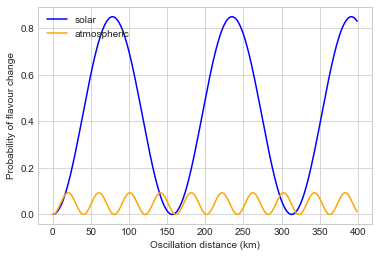

In [248]:
plt.plot(osc_distances, [two_phase_oscillation('solar', 0.005, i) for i in osc_distances], color='blue') # solar
plt.plot(osc_distances, [two_phase_oscillation('atmospheric', 2, i) for i in osc_distances], color='orange') # atmospheric
plt.legend(['solar', 'atmospheric'], loc='upper left')
plt.xlabel("Oscillation distance (km)")
plt.ylabel("Probability of flavour change")

In [267]:
def two_ts(**kwargs):
    if kwargs.get('hello'):
        print(kwargs['hello'])
    elif kwargs.get('goodbye'):
        print(kwargs['goodbye'])
    else:
        print('none')
    return

In [269]:
two_ts(goodbye='world_2')

world_2
